In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data_foled = 'data/'
data_file = 'network.csv'

In [3]:
df = pd.read_csv(data_foled+data_file, header=0, error_bad_lines=False)

/Users/akurochkin/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
df.columns = ['source_node', 'target_node']

In [5]:
edge_list_df = df.copy()

In [6]:
edge_list_df.head()

,source_node,target_node
0,-1,694
1,0,545
2,0,694
3,0,734
4,0,531


In [7]:
# Let us drop self-loops (connections from the node to itself: node A -> node A).
# For this reason, we first extend edge_list_df object

In [8]:
edge_list_df['connects_different_node'] = edge_list_df.apply(lambda row: row.source_node != row.target_node, axis=1)

In [9]:
# Have a look at the resulting DataFrame
edge_list_df.head()

,source_node,target_node,connects_different_node
0,-1,694,True
1,0,545,True
2,0,694,True
3,0,734,True
4,0,531,True


In [10]:
# And drop self-loops
edge_list_df = edge_list_df[edge_list_df.connects_different_node]

In [11]:
edge_list_df.head()

,source_node,target_node,connects_different_node
0,-1,694,True
1,0,545,True
2,0,694,True
3,0,734,True
4,0,531,True


In [12]:
# Lets'check for dupliacted rows
print("The number of duplicated rows = {}".format(len(edge_list_df[edge_list_df.duplicated()]) ))

The number of duplicated rows = 0


In [13]:
# OK, the data are clean. There are no duplicated rows

## Number of nodes

In [14]:
# The network we are considering right now is a directed one.
# So, we may check for the number of:
#  - source_nodes
#  - target_nodes
#  - all_node

In [15]:
# Source nodes. We use set() to drop duplicates
set_source_nodes = set(edge_list_df.source_node)
number_source_nodes = len(set_source_nodes)
print("The number of source nodes = {0}".format(number_source_nodes))

The number of source nodes = 737


In [16]:
# Target nodes
set_target_nodes = set(edge_list_df.target_node)
number_target_nodes = len(set_target_nodes)
print("The number of target nodes = {0}".format(number_target_nodes))

The number of target nodes = 595


In [17]:
# All nodes: union of source and target node sets
set_nodes = set_source_nodes | set_target_nodes
number_total_nodes = len(set_nodes)
print('Total number of nodes = {}'.format(number_total_nodes))

Total number of nodes = 868


In [18]:
# What do these numers tell us about the system?

### Number of directed links

In [19]:
# Since the dataset is clean we may just count the number or rows in our dataframe
number_directed_links = len(edge_list_df.index)

In [20]:
print("Number of directed links = {}".format(number_directed_links))

Number of directed links = 5321


## Node degrees distribution

Node degree for undirected network is defined as the number of links connected to the node.

In case of directed network we distinguish out-degree and in-degree of a node:
* out-degree of node A is defined as the number of links that starts at node A
* in-degree of node A is the number of links that end at node A

### Let's have a look at the sequence of out-degrees

In [21]:
# Since our data are clean, we may count out-degree of node A as the number of times it appeared in column source_node
out_degree_series = edge_list_df.source_node.value_counts()

In [22]:
# list_out_degrees is a Pandas.Series object containing node_id (as index) and node's out-degree (as data)
type(out_degree_series)

pandas.core.series.Series

In [23]:
# Average, min and max node degree
average_out_degree = np.mean(out_degree_series)
print("Average out-degree = {}".format(average_out_degree))
min_out_degree = np.min(out_degree_series)
print("Min out-degree = {}".format(min_out_degree))
max_out_degree = np.max(out_degree_series)
print("Max out-degree = {}".format(max_out_degree))

Average out-degree = 7.219810040705563
Min out-degree = 1
Max out-degree = 277


In [24]:
# Let's investigate the shape of the out-degree distribution
# Unnormalized distribution gives the number of nodes that have given out-degree
# To get this numbers we may count the number of times given degree appears in out_degree_series

In [25]:
out_degrees_counts = out_degree_series.value_counts()
out_degrees_counts.head()

1    144
2    140
3     99
4     64
5     57
Name: source_node, dtype: int64

In [26]:
# Let's convert it to DataFrame object:
out_degree_distribution = pd.DataFrame({'degree': out_degrees_counts.index, 
                                        'number_nodes': out_degrees_counts.values})

In [27]:
# and check the top rows of the corresponding DataFrame
out_degree_distribution.head()

,degree,number_nodes
0,1,144
1,2,140
2,3,99
3,4,64
4,5,57


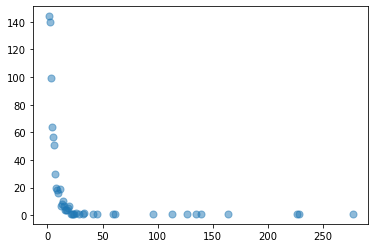

In [28]:
# Finally, we may plot the distribution
plt.scatter(x = out_degree_distribution.degree,
            y = out_degree_distribution.number_nodes,
            s=50, alpha=0.5)

In [29]:
# What can we say about the shape of the distribution?

In [30]:
# Let's consider semi-log scale, i.e. let's apply logarithmic scale to y-axis.
# In this case visually the "distance" between 1 and 10 is the same as between 10 and 100 or 100 and 1000
# If the distribution follows exponential decay, it should convert to a straight line on this scale

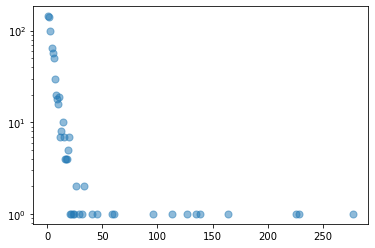

In [31]:
plt.scatter(x = out_degree_distribution.degree,
            y = out_degree_distribution.number_nodes,
            s=50, alpha=0.5)
plt.yscale('log')

In [32]:
# Is the distribution visible better? Close to straight line? What about outliers? 

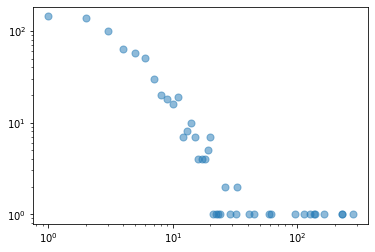

In [33]:
# Let's conside double logarithmic scale.
# Apply logarithmic scale to both axes
plt.scatter(x = out_degree_distribution.degree,
            y = out_degree_distribution.number_nodes,
            s=50, alpha=0.5)
plt.yscale('log')
plt.xscale('log')

## Compare to models. igraph library

In [34]:
# Let us compare our graph with the one generated by a basic model 
# And get familiar with igraph library

In [35]:
import igraph

In [36]:
# A single line below allows us to generate Erdos-Renyi graph with given number of nodes and number of links.
# Note, insted of providing the number of links one may provide probability that two nodes are connected

In [37]:
g = igraph.Graph.Erdos_Renyi(n=number_total_nodes, m=number_directed_links, directed=True)

In [38]:
# Let's check the number of nodes and links:
number_nodes_er = g.vcount()
print("Number of nodes (ER graph) = {0}".format(number_nodes_er))
number_links_er = g.ecount()
print("Number of directed links (ER graph) = {0}".format(number_links_er))

Number of nodes (ER graph) = 868
Number of directed links (ER graph) = 5321


In [39]:
# Now, prepare a list of out degrees for Erdos-Renyi graph
out_degree_list_er = g.vs.degree(mode='OUT')

In [40]:
# Average, min and max node degree
average_out_degree_er = np.mean(out_degree_list_er)
print("Average out-degree = {}".format(average_out_degree_er))
min_out_degree_er = np.min(out_degree_list_er)
print("Min out-degree = {}".format(min_out_degree_er))
max_out_degree_er = np.max(out_degree_list_er)
print("Average out-degree = {}".format(max_out_degree_er))

Average out-degree = 6.130184331797235
Min out-degree = 0
Average out-degree = 16


In [41]:
# Let's repeat the procedure to get degree distribution for Erdos-Renyi model graph
out_degree_series_er = pd.Series(out_degree_list_er)

In [42]:
out_degrees_counts_er = out_degree_series_er.value_counts()
out_degrees_counts_er.head()

5    137
4    130
6    123
7    112
8     80
dtype: int64

In [43]:
# And convert it to dataframe object:
out_degree_distribution_er = pd.DataFrame({'degree': out_degrees_counts_er.index, 
                                           'number_nodes': out_degrees_counts_er.values})

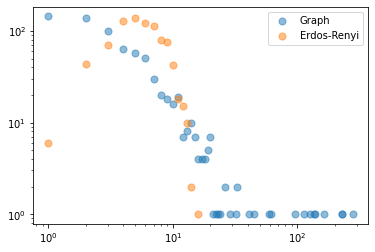

In [44]:
# Conside double logarithmic scale.
# Apply logarithmic scale to both axes
plt.scatter(x = out_degree_distribution.degree,
            y = out_degree_distribution.number_nodes,
            s=50, alpha=0.5, label='Graph')
plt.scatter(x = out_degree_distribution_er.degree,
            y = out_degree_distribution_er.number_nodes,
            s=50, alpha=0.5, label='Erdos-Renyi')

plt.yscale('log')
plt.xscale('log')
plt.legend()